In [1]:
#imports
#numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

#estimators
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

#model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix

#cross validation
from sklearn.model_selection import train_test_split

# Scale class variables
from sklearn.preprocessing import LabelEncoder

In [2]:
# 1. Analisis inicial de la data
# 1.1. importar el dataset
bookings = pd.read_csv('hotel_bookings.csv', header=0)

In [3]:
# 1.2. primeros registros
bookings.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# 1.3. estadisticas descriptivas generales del dataset
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
# 1.4. tipo de datos de las variables
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
# 2. Preprocessing
# 2.1. guardar una copia del dataset para modificarlo
bookings2=bookings.copy()

In [7]:
# 2.2. eliminar columnas que no se consideran relevantes para la prediccion a realizar
bookings2 = bookings2.drop(['arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month',
                            'reservation_status_date','reservation_status'],1)

In [8]:
# 2.3. SUstituye los NA por cero (0)
bookings2['country'] = bookings2['country'].fillna(0)
bookings2['children'] = bookings2['children'].fillna(0)

In [9]:
# 2.4. cambio de tipo de variables
bookings2['country'] = bookings2['country'].astype('str')
bookings2['children'] = bookings2['children'].astype('int')

In [10]:
# 2.5. Guardar escala para codificar variables categoricas
scalerHO = LabelEncoder().fit(bookings2.hotel)

scalerMonth = LabelEncoder().fit(bookings2.arrival_date_month)

scalerMe = LabelEncoder().fit(bookings2.meal)

scalerCoun = LabelEncoder().fit(bookings2.country)

scalermKt = LabelEncoder().fit(bookings2.market_segment)

scalerDist = LabelEncoder().fit(bookings2.distribution_channel)

scalerRR = LabelEncoder().fit(bookings2.reserved_room_type)

scalerART = LabelEncoder().fit(bookings2.assigned_room_type)

scalerDep = LabelEncoder().fit(bookings2.deposit_type)

scalerCus = LabelEncoder().fit(bookings2.customer_type)

In [11]:
# 2.5.1. Valores asigandos a la vaiable con respecto a las etiquetas 'hotel'
pd.DataFrame({
    "original": list(scalerHO.classes_),
    "codificada": list(scalerHO.transform(scalerHO.classes_))
})

,original,codificada
0,City Hotel,0
1,Resort Hotel,1


In [12]:
# 2.5.2. Valores asigandos a la vaiable con respecto a las etiquetas 'arrival_date_month'
pd.DataFrame({
    "original": list(scalerMonth.classes_),
    "codificada": list(scalerMonth.transform(scalerMonth.classes_))
})

,original,codificada
0,April,0
1,August,1
2,December,2
3,February,3
4,January,4
5,July,5
6,June,6
7,March,7
8,May,8
9,November,9


In [13]:
# 2.5.3. Valores asigandos a la vaiable con respecto a las etiquetas 'meal'
pd.DataFrame({
    "original": list(scalerMe.classes_),
    "codificada": list(scalerMe.transform(scalerMe.classes_))
})

,original,codificada
0,BB,0
1,FB,1
2,HB,2
3,SC,3
4,Undefined,4


In [14]:
# 2.5.4. Valores asigandos a la vaiable con respecto a las etiquetas 'country'
pd.DataFrame({
    "original": list(scalerCoun.classes_),
    "codificada": list(scalerCoun.transform(scalerCoun.classes_))
})

,original,codificada
0,0,0
1,ABW,1
2,AGO,2
3,AIA,3
4,ALB,4
...,...,...
173,VGB,173
174,VNM,174
175,ZAF,175
176,ZMB,176


In [15]:
# 2.5.5. Valores asigandos a la vaiable con respecto a las etiquetas 'market_segment'
pd.DataFrame({
    "original": list(scalermKt.classes_),
    "codificada": list(scalermKt.transform(scalermKt.classes_))
})

,original,codificada
0,Aviation,0
1,Complementary,1
2,Corporate,2
3,Direct,3
4,Groups,4
5,Offline TA/TO,5
6,Online TA,6
7,Undefined,7


In [16]:
# 2.5.6. Valores asigandos a la vaiable con respecto a las etiquetas 'distribution_channel'
pd.DataFrame({
    "original": list(scalerDist.classes_),
    "codificada": list(scalerDist.transform(scalerDist.classes_))
})

,original,codificada
0,Corporate,0
1,Direct,1
2,GDS,2
3,TA/TO,3
4,Undefined,4


In [17]:
# 2.5.7. Valores asigandos a la vaiable con respecto a las etiquetas 'reserved_room_type'
pd.DataFrame({
    "original": list(scalerRR.classes_),
    "codificada": list(scalerRR.transform(scalerRR.classes_))
})

,original,codificada
0,A,0
1,B,1
2,C,2
3,D,3
4,E,4
5,F,5
6,G,6
7,H,7
8,L,8
9,P,9


In [18]:
# 2.5.8. Valores asigandos a la vaiable con respecto a las etiquetas 'assigned_room_type'
pd.DataFrame({
    "original": list(scalerART.classes_),
    "codificada": list(scalerART.transform(scalerART.classes_))
})

,original,codificada
0,A,0
1,B,1
2,C,2
3,D,3
4,E,4
5,F,5
6,G,6
7,H,7
8,I,8
9,K,9


In [19]:
# 2.5.9. Valores asigandos a la vaiable con respecto a las etiquetas 'deposit_type'
pd.DataFrame({
    "original": list(scalerDep.classes_),
    "codificada": list(scalerDep.transform(scalerDep.classes_))
})

,original,codificada
0,No Deposit,0
1,Non Refund,1
2,Refundable,2


In [20]:
# 2.5.10. Valores asigandos a la vaiable con respecto a las etiquetas 'customer_type'
pd.DataFrame({
    "original": list(scalerCus.classes_),
    "codificada": list(scalerCus.transform(scalerCus.classes_))
})

,original,codificada
0,Contract,0
1,Group,1
2,Transient,2
3,Transient-Party,3


In [21]:
# 2.6. Transformacion de las variables categoricas
bookings2.hotel = scalerHO.transform(bookings2.hotel)

bookings2.arrival_date_month = scalerMonth.transform(bookings2.arrival_date_month)

bookings2.meal = scalerMe.transform(bookings2.meal)

bookings2.country = scalerCoun.transform(bookings2.country)

bookings2.market_segment = scalermKt.transform(bookings2.market_segment)

bookings2.distribution_channel = scalerDist.transform(bookings2.distribution_channel)

bookings2.reserved_room_type = scalerRR.transform(bookings2.reserved_room_type)

bookings2.assigned_room_type = scalerART.transform(bookings2.assigned_room_type)

bookings2.deposit_type = scalerDep.transform(bookings2.deposit_type)

bookings2.customer_type = scalerCus.transform(bookings2.customer_type)

In [22]:
# 2.7. Sustituye los Null por cero (0)

bookings2['agent'] = bookings2['agent'].fillna(0)

bookings2['company'] = bookings2['company'].fillna(0)

In [23]:
# 2.8. estadisticas descriptivas generales del dataset modificado

bookings2.describe()

,hotel,is_canceled,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.335539,0.370416,104.011416,5.490544,0.927599,2.500302,1.856403,0.103886,0.007949,0.555742,...,1.329399,0.221124,0.124893,74.828319,10.775157,2.321149,2.137323,101.831122,0.062518,0.571363
std,0.472181,0.482918,106.863097,3.535075,0.998613,1.908286,0.579261,0.398555,0.097436,1.068598,...,1.878762,0.652306,0.334678,107.141953,53.943884,17.594721,0.577040,50.535790,0.245291,0.792798
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,0.000000,18.000000,2.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,69.290000,0.000000,0.000000
50%,0.000000,0.000000,69.000000,6.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,2.000000,94.575000,0.000000,0.000000
75%,1.000000,1.000000,160.000000,8.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,...,3.000000,0.000000,0.000000,152.000000,0.000000,0.000000,2.000000,126.000000,0.000000,1.000000
max,1.000000,1.000000,737.000000,11.000000,19.000000,50.000000,55.000000,10.000000,10.000000,4.000000,...,11.000000,21.000000,2.000000,535.000000,543.000000,391.000000,3.000000,5400.000000,8.000000,5.000000


In [24]:
# 2.9. tipo de datos de las variables del dataset modificado

bookings2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_month              119390 non-null  int32  
 4   stays_in_weekend_nights         119390 non-null  int64  
 5   stays_in_week_nights            119390 non-null  int64  
 6   adults                          119390 non-null  int64  
 7   children                        119390 non-null  int32  
 8   babies                          119390 non-null  int64  
 9   meal                            119390 non-null  int32  
 10  country                         119390 non-null  int32  
 11  market_segment                  119390 non-null  int32  
 12  distribution_cha

In [25]:
# 2.10. cambiar tipo de data a category

bookings2['hotel'] = bookings2['hotel'].astype('category')
bookings2['is_canceled'] = bookings2['is_canceled'].astype('category')
bookings2['arrival_date_month'] = bookings2['arrival_date_month'].astype('category')
bookings2['meal'] = bookings2['meal'].astype('category')
bookings2['country'] = bookings2['country'].astype('category')
bookings2['market_segment'] = bookings2['market_segment'].astype('category')
bookings2['distribution_channel'] = bookings2['distribution_channel'].astype('category')
bookings2['is_repeated_guest'] = bookings2['is_repeated_guest'].astype('category')
bookings2['reserved_room_type'] = bookings2['reserved_room_type'].astype('category')
bookings2['assigned_room_type'] = bookings2['assigned_room_type'].astype('category')
bookings2['deposit_type'] = bookings2['deposit_type'].astype('category')
bookings2['agent'] = bookings2['agent'].astype('category')
bookings2['company'] = bookings2['company'].astype('category')
bookings2['customer_type'] = bookings2['customer_type'].astype('category')

In [26]:
# 2.11. tipo de datos de las variables del dataset modificado

bookings2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 27 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  category
 1   is_canceled                     119390 non-null  category
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_month              119390 non-null  category
 4   stays_in_weekend_nights         119390 non-null  int64   
 5   stays_in_week_nights            119390 non-null  int64   
 6   adults                          119390 non-null  int64   
 7   children                        119390 non-null  int32   
 8   babies                          119390 non-null  int64   
 9   meal                            119390 non-null  category
 10  country                         119390 non-null  category
 11  market_segment                  119390 non-null  category
 12  di

In [27]:
# 2.12. Correlación

corr_matrix  = bookings2.corr()

corr_matrix.style.background_gradient(cmap='coolwarm')

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
lead_time,1.000000,0.085671,0.165799,0.119519,-0.037613,-0.020915,0.086042,-0.073548,0.000149,0.170084,-0.063077,-0.116451,-0.095712
stays_in_weekend_nights,0.085671,1.000000,0.498969,0.091871,0.045794,0.018483,-0.012775,-0.042715,0.063281,-0.054151,0.049342,-0.018554,0.072671
stays_in_week_nights,0.165799,0.498969,1.000000,0.092976,0.044203,0.020191,-0.013992,-0.048743,0.096209,-0.002020,0.065237,-0.024859,0.068192
adults,0.119519,0.091871,0.092976,1.000000,0.030440,0.018146,-0.006738,-0.107983,-0.051673,-0.008283,0.230641,0.014785,0.122884
children,-0.037613,0.045794,0.044203,0.030440,1.000000,0.024030,-0.024729,-0.021072,0.048952,-0.033271,0.324853,0.056255,0.081736
babies,-0.020915,0.018483,0.020191,0.018146,0.024030,1.000000,-0.007501,-0.006550,0.083440,-0.010621,0.029186,0.037383,0.097889
previous_cancellations,0.086042,-0.012775,-0.013992,-0.006738,-0.024729,-0.007501,1.000000,0.152728,-0.026993,0.005929,-0.065646,-0.018492,-0.048384
previous_bookings_not_canceled,-0.073548,-0.042715,-0.048743,-0.107983,-0.021072,-0.006550,0.152728,1.000000,0.011608,-0.009397,-0.072144,0.047653,0.037824
booking_changes,0.000149,0.063281,0.096209,-0.051673,0.048952,0.083440,-0.026993,0.011608,1.000000,-0.011634,0.019618,0.065620,0.052833
days_in_waiting_list,0.170084,-0.054151,-0.002020,-0.008283,-0.033271,-0.010621,0.005929,-0.009397,-0.011634,1.000000,-0.040756,-0.030600,-0.082730


In [28]:
# 3. Entrenamiento de modelos
# 3.1. Seleccionar las variables independientes - features

features = bookings2.drop('is_canceled', 1)
print('Summary of feature sample')
features.head()

Summary of feature sample


,hotel,lead_time,arrival_date_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,1,342,5,0,0,2,0,0,0,136,...,2,3,0,0.0,0.0,0,2,0.0,0,0
1,1,737,5,0,0,2,0,0,0,136,...,2,4,0,0.0,0.0,0,2,0.0,0,0
2,1,7,5,0,1,1,0,0,0,60,...,2,0,0,0.0,0.0,0,2,75.0,0,0
3,1,13,5,0,1,1,0,0,0,60,...,0,0,0,304.0,0.0,0,2,75.0,0,0
4,1,14,5,0,2,2,0,0,0,60,...,0,0,0,240.0,0.0,0,2,98.0,0,1


In [29]:
# 3.2. Seleccionar la variable dependiente

depVar = bookings2['is_canceled']
depVar.head()

0    0
1    0
2    0
3    0
4    0
Name: is_canceled, dtype: category
Categories (2, int64): [0, 1]

In [30]:
# 3.3. Dividir en Test 20% y Train 70%
X_train, X_test, y_train, y_test = train_test_split(features,
                                                          depVar,
                                                          test_size=0.2,
                                                          random_state=42)

In [31]:
#Datos de Train, variable dependiente Y

y_train_count = len(y_train.index)
print('The number of observations in the Y (Dependent variable) training set are:',str(y_train_count))

The number of observations in the Y (Dependent variable) training set are: 95512


In [32]:
#Datos de Test, variable independiente X

X_test_count = len(X_test.index)
print('The number of observations in the X (Predictors) testing set is:',str(X_test_count))

The number of observations in the X (Predictors) testing set is: 23878


In [33]:
#Datos de Test, variable dependiente Y

y_test_count = len(y_test.index)
print('The number of observations in the Y (Dependent variable) testing set are:',str(y_test_count))

The number of observations in the Y (Dependent variable) testing set are: 23878


In [34]:
#Cantidad de muestras para cada set
print('Predictors shape:')
print(X_train.shape, X_test.shape)

print('Dependent variable shape:')
print(y_train.shape, y_test.shape)

Predictors shape:
(95512, 26) (23878, 26)
Dependent variable shape:
(95512,) (23878,)


In [35]:
# 3.4. Defnicion de los modelos a utilizar

modelLR = LogisticRegression()
modelRF =RandomForestClassifier()
modelGBC = GradientBoostingClassifier()
modelKNC = KNeighborsClassifier()
modelGNB = GaussianNB()

In [36]:
# 3.4.1.1. Entrenar con modelo "Logistic Regression" 
trainLR = modelLR.fit(X_train,y_train)
trainLR

c:\users\grettel\appdata\local\programs\python\python38-32\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
# 3.4.1.2. Predecir con moldelo Logistc Regression
predictsLR = modelLR.predict(X_test)

# Evaluate accuracy
print ('Accuracy score LR model:')
print(accuracy_score(y_test, predictsLR))
print()

# F1
print ('F1 score LR model:')
print(f1_score(y_test, predictsLR))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsLR))
print()

print("Classification Report:")
print(classification_report(y_test, predictsLR))

Accuracy score LR model:
0.767526593517045

F1 score LR model:
0.6533441578717292

Confusion Matrix:
[[13096  1811]
 [ 3740  5231]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.88      0.83     14907
           1       0.74      0.58      0.65      8971

    accuracy                           0.77     23878
   macro avg       0.76      0.73      0.74     23878
weighted avg       0.76      0.77      0.76     23878



In [38]:
# 3.4.2.1. Entrenar con modelo "Random Forest" 
trainRF = modelRF.fit(X_train,y_train)
trainRF

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [39]:
# 3.4.2.2. Predecir con modelo Randon Forest
predictsRF = modelRF.predict(X_test)

# Accuracy
print ('Accuracy score RF model:')
print(accuracy_score(y_test, predictsRF))
print()

# F1
print ('F1 score RF model:')
print(f1_score(y_test, predictsRF))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsRF))
print()

print("Classification Report:")
print(classification_report(y_test, predictsRF))

Accuracy score RF model:
0.8957199095401625

F1 score RF model:
0.8562687601015933

Confusion Matrix:
[[13971   936]
 [ 1554  7417]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     14907
           1       0.89      0.83      0.86      8971

    accuracy                           0.90     23878
   macro avg       0.89      0.88      0.89     23878
weighted avg       0.90      0.90      0.89     23878



In [40]:
# 3.4.3.1. Entrenar con modelo"Gradient Boosting Machine" 
trainGBC = modelGBC.fit(X_train,y_train)
trainGBC

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [41]:
# 3.4.3.2. Predecir con modelo GBC
predictsGBC = modelGBC.predict(X_test)

# Accuracy
print ('Accuracy score GBC model:')
print(accuracy_score(y_test, predictsGBC))
print()

# F1
print ('F1 score GBC model:')
print(f1_score(y_test, predictsGBC))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGBC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGBC))

Accuracy score GBC model:
0.8468045899991624

F1 score GBC model:
0.7825208085612367

Confusion Matrix:
[[13639  1268]
 [ 2390  6581]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88     14907
           1       0.84      0.73      0.78      8971

    accuracy                           0.85     23878
   macro avg       0.84      0.82      0.83     23878
weighted avg       0.85      0.85      0.84     23878



In [42]:
# 3.4.4.1. Entrenar con el modelo "K-Nearest Neighbors"
trainKNC = modelKNC.fit(X_train,y_train)
trainKNC

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [43]:
# 3.4.4.2. Predecir con el modelo KNC 
predictsKNC = modelKNC.predict(X_test)

# Accuracy
print ('Accuracy score KNN model:')
print(accuracy_score(y_test, predictsKNC))
print()

# F1
print ('F1 score KNN model:')
print(f1_score(y_test, predictsKNC))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsKNC))
print()

print("Classification Report:")
print(classification_report(y_test, predictsKNC))

Accuracy score KNN model:
0.8045899991624089

F1 score KNN model:
0.7310042661132249

Confusion Matrix:
[[12872  2035]
 [ 2631  6340]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.86      0.85     14907
           1       0.76      0.71      0.73      8971

    accuracy                           0.80     23878
   macro avg       0.79      0.79      0.79     23878
weighted avg       0.80      0.80      0.80     23878



In [44]:
# 3.4.5.1. Entrenar con el modelo "Gaussian Naive Bayes" 
trainGNB = modelGNB.fit(X_train,y_train)
trainGNB

GaussianNB(priors=None, var_smoothing=1e-09)

In [45]:
# 3.4.5.2. Predecir con el modelo GNB 
predictsGNB = modelGNB.predict(X_test)

# accuracy
print ('Accuracy score GNB model:')
print(accuracy_score(y_test, predictsGNB))
print()

# F1
print ('F1 score GNB model:')
print(f1_score(y_test, predictsGNB))
print()

print("Confusion Matrix:")
print(confusion_matrix(y_test, predictsGNB))
print()

print("Classification Report:")
print(classification_report(y_test, predictsGNB))

Accuracy score GNB model:
0.5566630371052852

F1 score GNB model:
0.6098909198113208

Confusion Matrix:
[[5017 9890]
 [ 696 8275]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.34      0.49     14907
           1       0.46      0.92      0.61      8971

    accuracy                           0.56     23878
   macro avg       0.67      0.63      0.55     23878
weighted avg       0.72      0.56      0.53     23878



In [52]:
# 4. Resultados de prediccion
# 4.1. Generar tabla con valores reales vs prediccion
RealvsPredictDF = pd.DataFrame({'Real': y_test, 'Prediccion': predictsRF}, columns=['Real', 'Prediccion'])

In [53]:
# 4.2. Cambiar los valores de 0 y 1 por sus definiciones
RealvsPredictDF['Real'] = RealvsPredictDF['Real'].apply({0:'No Cancela', 1:'Cancela'}.get)
RealvsPredictDF['Prediccion'] = RealvsPredictDF['Prediccion'].apply({0:'No Cancela', 1:'Cancela'}.get)

In [54]:
# 4.3. Resumir resultados de la tabla de valores reales vs prediccion
RealvsPredictCount = RealvsPredictDF.apply(pd.value_counts).rename_axis('Value')
RealvsPredictCount

,Real,Prediccion
Value,,
No Cancela,14907,15525
Cancela,8971,8353


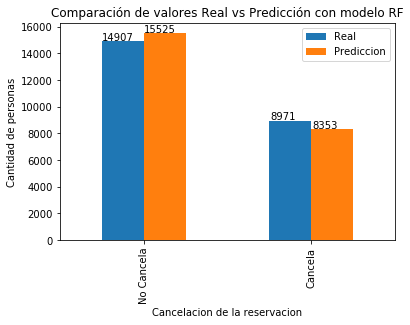

In [56]:
# 4.4. Grafico de valores reales vs prediccion

Plot1 = RealvsPredictCount.plot(kind='bar') #customize as you want
plt.xlabel("Cancelacion de la reservacion")
plt.ylabel("Cantidad de personas")
plt.title("Comparación de valores Real vs Predicción con modelo RF")
for p in Plot1.patches:
    Plot1.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))